# Data preprocessing

## Import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn as mlf_sklearn
from mlflow.models import infer_signature

In [2]:
mlflow.set_tracking_uri('http://localhost:8888')
mlflow.set_experiment('KN baseline')

2025/10/18 10:21:57 INFO mlflow.tracking.fluent: Experiment with name 'KN baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/975854134767553070', creation_time=1760782917351, experiment_id='975854134767553070', last_update_time=1760782917351, lifecycle_stage='active', name='KN baseline', tags={}>

## Load dataset

In [3]:
df = pd.read_csv("/home/data/UpdatedResumeDataSet.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

## Explore categories

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

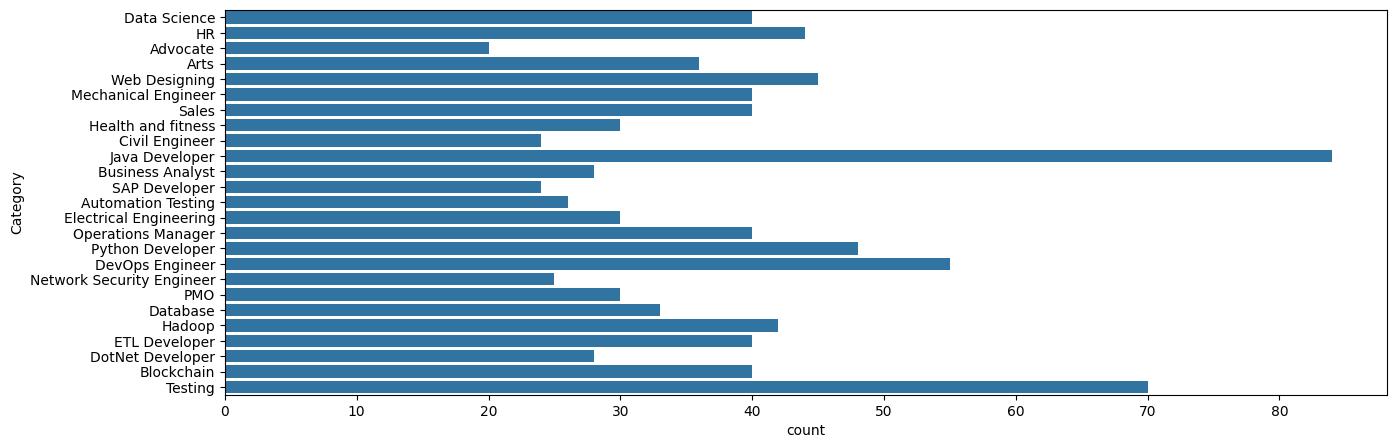

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

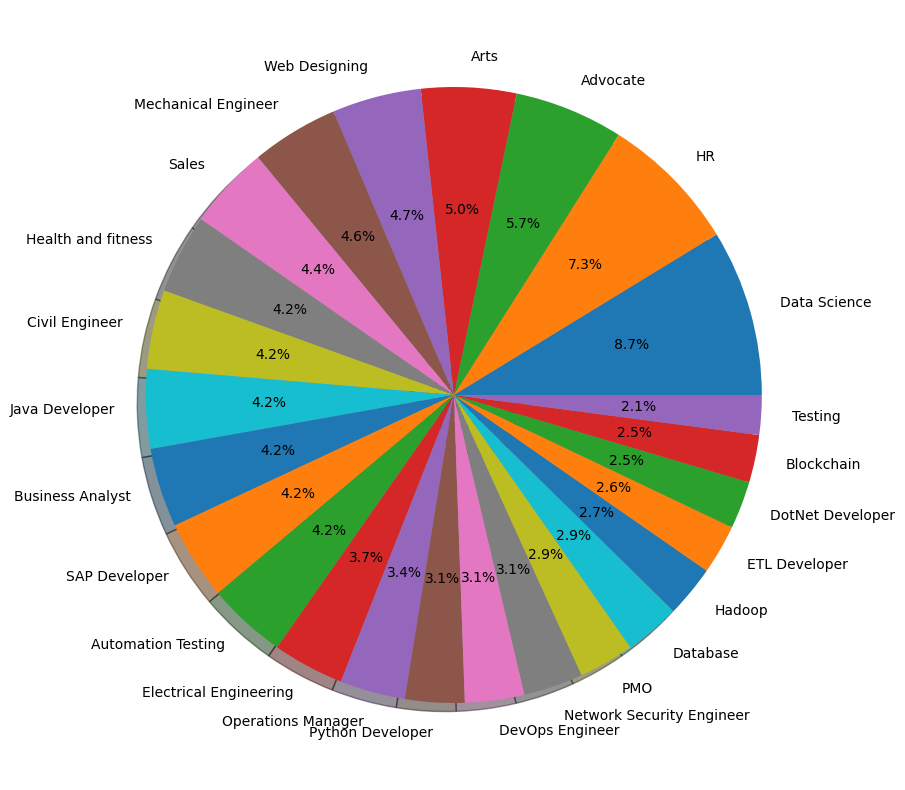

In [9]:
plt.figure(figsize=(15, 10))
plt.pie(df['Category'].value_counts(), labels=df['Category'].unique(), autopct='%1.1f%%', shadow=True)
plt.show()

## Balance Classes (Categories)

In [10]:
# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Business Analyst             84
Automation Testing           84
Arts  

/tmp/ipykernel_42722/1665345931.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


## Clean data

In [11]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_42722/3739445999.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
/tmp/ipykernel_42722/3739445999.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
/tmp/ipykernel_42722/3739445999.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
/tmp/ipykernel_42722/3739445999.py:7: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub('[%s]' % re.es

In [12]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [14]:
df['Resume'][0]

'Key Skills Requirement Gathering Requirement Analysis Design Specifications Client Communication System Documentation Problem solving SDLC Operating Systems Windows OS UNIX Linux Ubuntu Languages Java C Web Languages JavaScript HTML Tools Citrix Software System Architect Quality Center v9 0 v10 0 Tortoise SVN DOORS Artifact Viewer JformDesigner JIRA Microsoft D365 Other Skills Microsoft Office MS Excel MS PowerPoint MS Visio AutoCAD VLSI MS CIT Certified Education Details January 2012 BE Electronics Mumbai Maharashtra Mumbai University January 2006 Maharashtra State Board Business Analyst Business Analyst Intertek India Pvt Ltd Skill Details SDLC Exprience 75 months VISIO Exprience 60 months REQUIREMENT GATHERING Exprience 15 months Documentation Exprience Less than 1 year months Functional Testing Exprience Less than 1 year months Business Analysis Exprience Less than 1 year months Jira Exprience Less than 1 year monthsCompany Details company Intertek India Pvt Ltd description Busine

## Words into categorical values

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df.Category.unique()

array([ 4,  2,  1,  7,  3, 13, 19, 20,  5, 21,  6, 16, 23, 15,  0, 24,  9,
        8, 22, 10, 17, 18, 11, 14, 12])

## Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredTxt  = tfidf.transform(df['Resume'])

## Split for training

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(requiredTxt, df['Category'], test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1680, 7351)

In [21]:
X_test.shape

(420, 7351)

# Train model and classification report

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning

🏃 View run blushing-gnu-91 at: http://localhost:8888/#/experiments/975854134767553070/runs/539fc875541d47c188ecd550f81b1f64
🧪 View experiment at: http://localhost:8888/#/experiments/975854134767553070


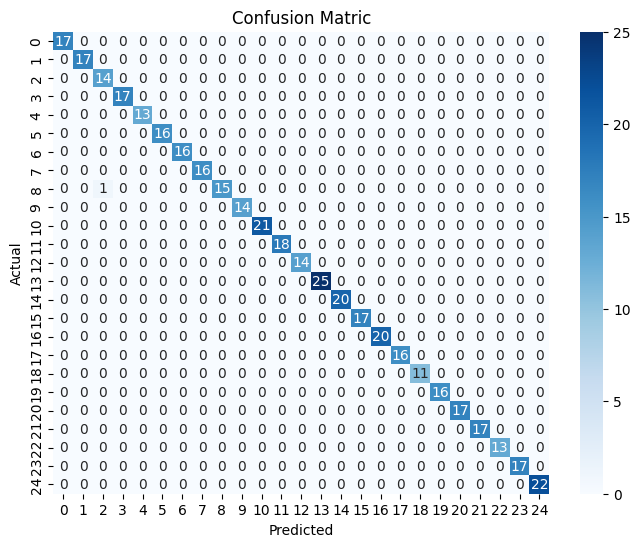

In [ ]:
with mlflow.start_run() as run:
    mlflow.set_tag('mlflow.name', 'KNeighbors_TrainTestSplit')
    knn_model = OneVsRestClassifier(KNeighborsClassifier())
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    mlflow.log_metric("Accuracy", accuracy_score(y_test, y_pred_knn))

    classification_rp = classification_report(y_test, y_pred_knn, output_dict=True)
    for label, metrics in classification_rp.items():
        if isinstance(metrics, dict):
            for metric, val in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", val)

    conf_matrix = confusion_matrix(y_test, y_pred_knn)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matric")
    plt.savefig("/home/data/confusion_matrix.png")
    mlflow.log_artifact("/home/data/confusion_matrix.png")

    input_example= pd.DataFrame(X_test[:5], columns=tfidf.get_feature_names_out())
    sign = infer_signature(input_example, knn_model.predict(input_example))
    mlf_sklearn.log_model(knn_model, 'KNeigbours', signature=sign, input_example=input_example)

In [27]:
## Save file
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(knn_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

# Prediction

In [29]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    my_tfidf = pickle.load(open('/home/data/res/tfidf.pkl', 'rb'))
    my_model = pickle.load(open('/home/data/res/clf.pkl', 'rb'))
    my_le = pickle.load(open('/home/data/res/encoder.pkl', 'rb'))

    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = my_tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = my_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = my_le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [30]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [31]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'

In [32]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

'Network Security Engineer'

In [33]:
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Advocate-focused resume
pred(myresume)

'Advocate'